Curso Realizado: [Cloud Academy - Calculated Systems](https://cloudacademy.com/course/common-machine-learning-models-how-to-train-them-1120/course-introduction/?context_resource=lp&context_id=2122)

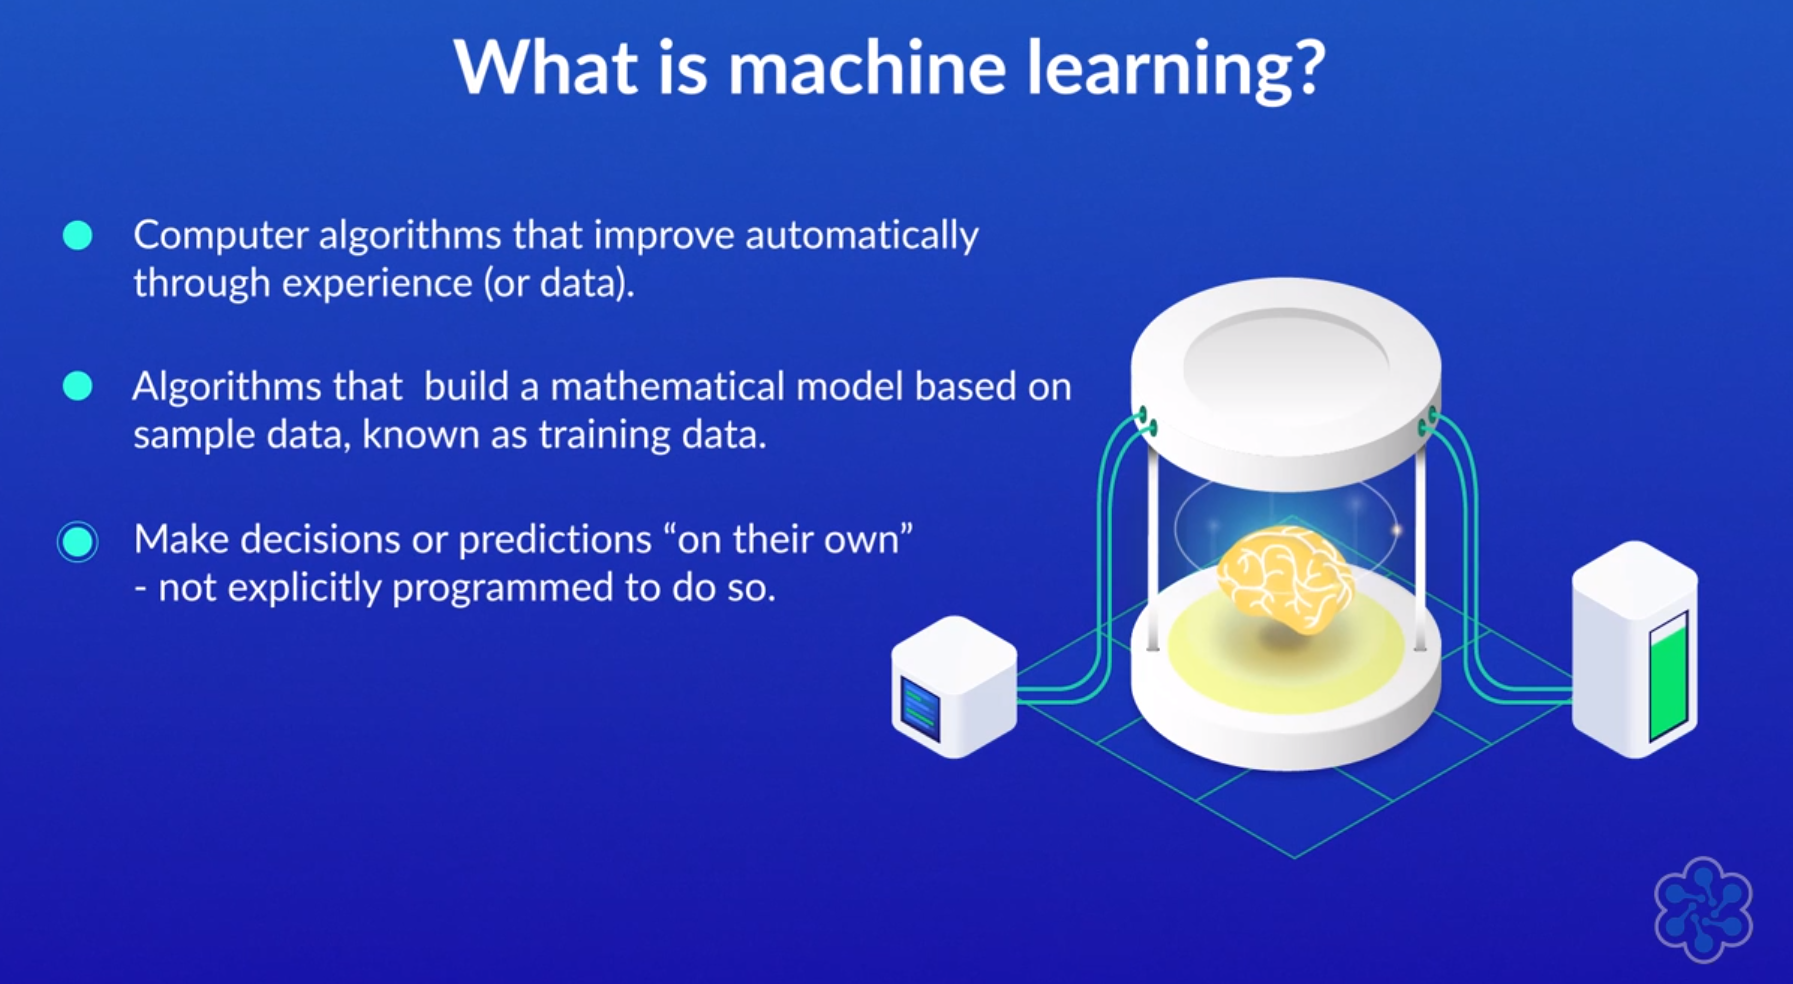

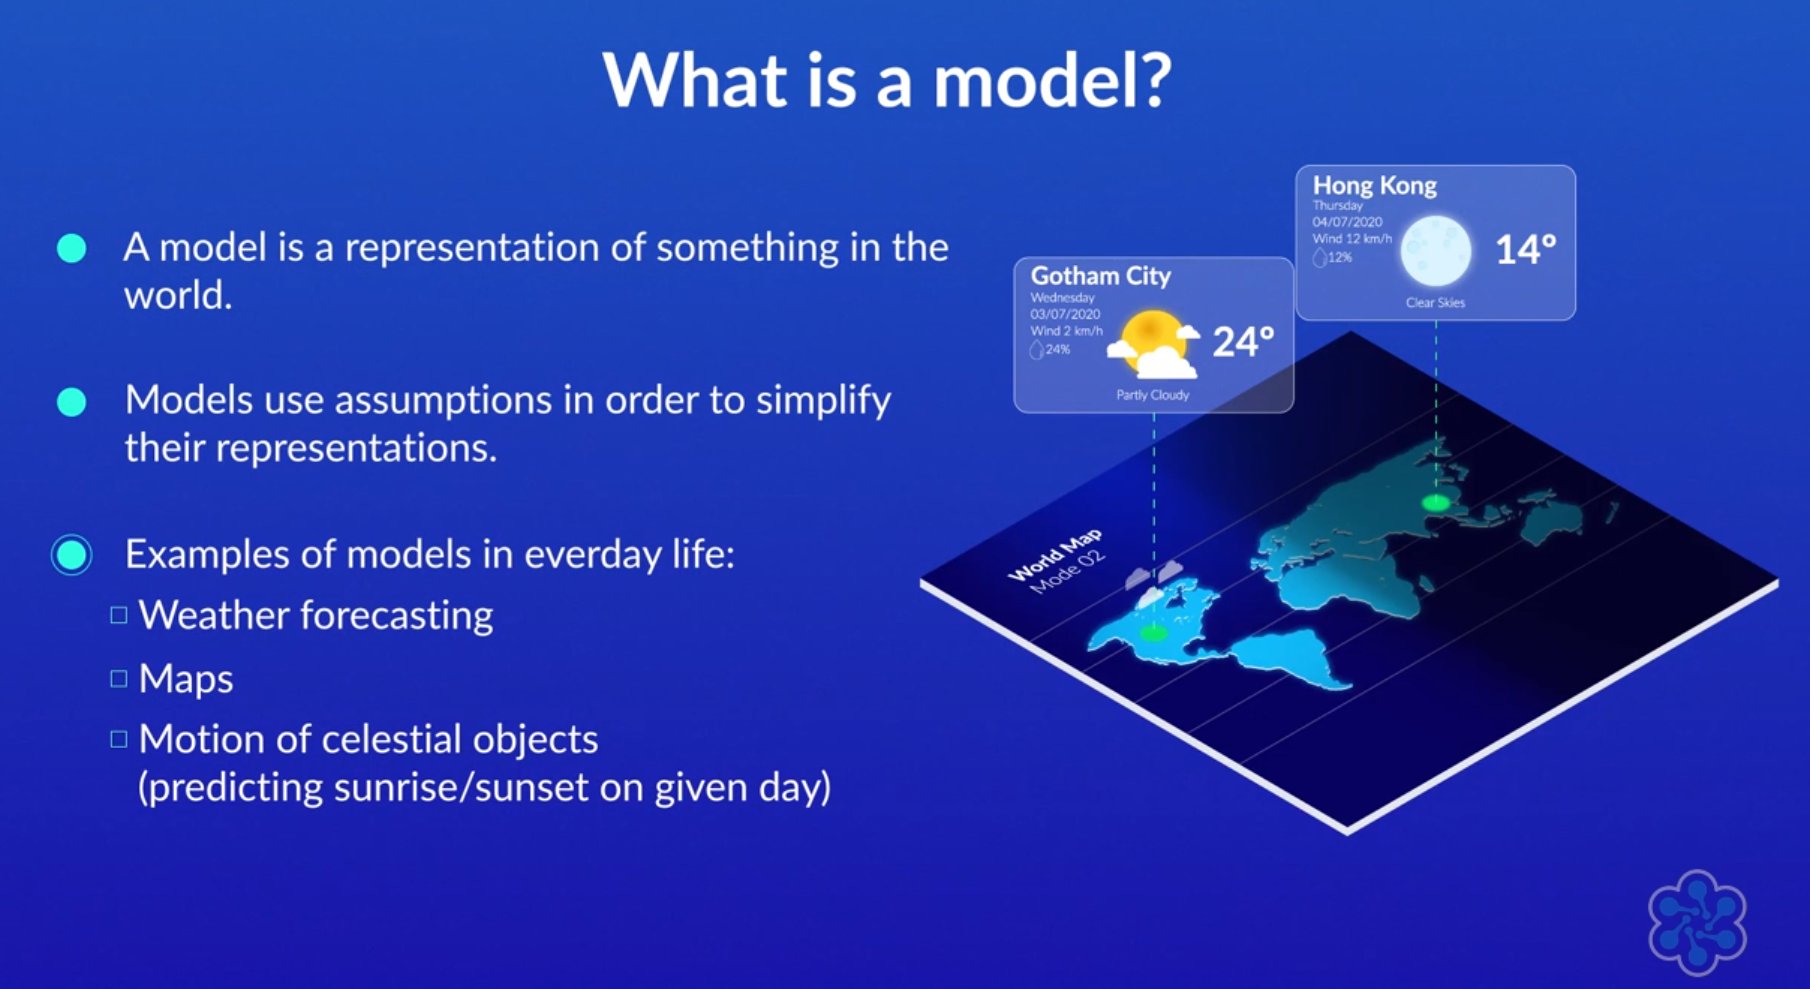

# How do Models Make Predictions?

- Select a model that is a good representation of the relationship between your inputs and your desired output;
- A childs height might be represented by a linear model based on age;
- Use data to "train" the model to parameterize the relationship;
- Use the ages and heights of 100 children to determine how much height varies with age;
- Evaluate those predictions;
- Use the model to predict the height of a new set of 100 children and see how close the models predictions are to each childs actual height;
- Refine the model;
- If the height predictions are way off, you can go back to any of the previous steps to improve your model.

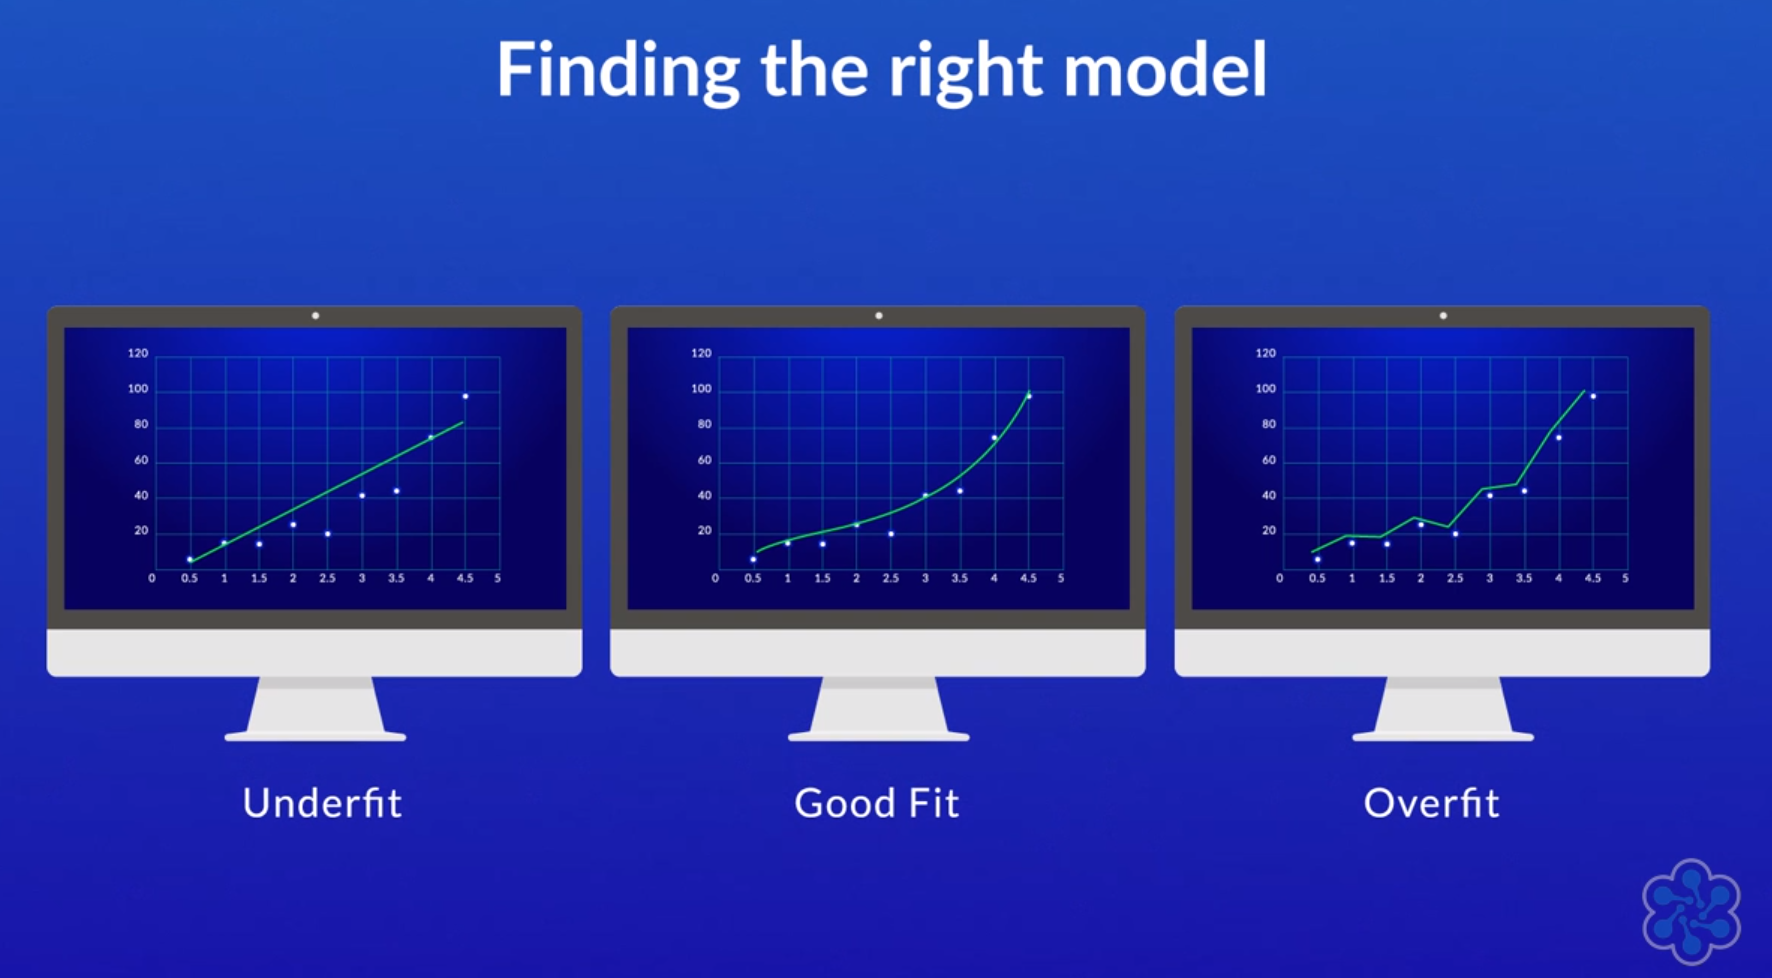

# Understanding Training Data Sets

- **Feature**: A property of your training data used as input to the model;
- **Label**: The expected output for your model.

A labeled data set allows you to both train and evaluate the data set.

## Types of Features

- **Numeric**: Age;
- **Categoric**: 
  - **Unordered**: Male/Female
  - **Ordered**: opinions (negative, neutral, positive)

## Types of Machine Learning Algorithms

### Supervised Learning

- This is the type of model that uses the labeled training data in order to build its predictions;
- The training data has both the input and output clearly mapped;
- We call it supervised because the algorithm is given all of the data it needs to build a model.

### Unsupervised Learning

- This uses unlabeled training data to make inferences without any label to learn from. Algorithms of this category look for relations in the features in order to build an understanding of how they come together.

### Semi-Supervised Learning

- We take time to build labels for some of the data, but not all of the data.

### Reinforced Learning

- It uses trial and error to determine the best course of action and the best way to build the model;
- Is a strong choice if you don't have a lot of training data.

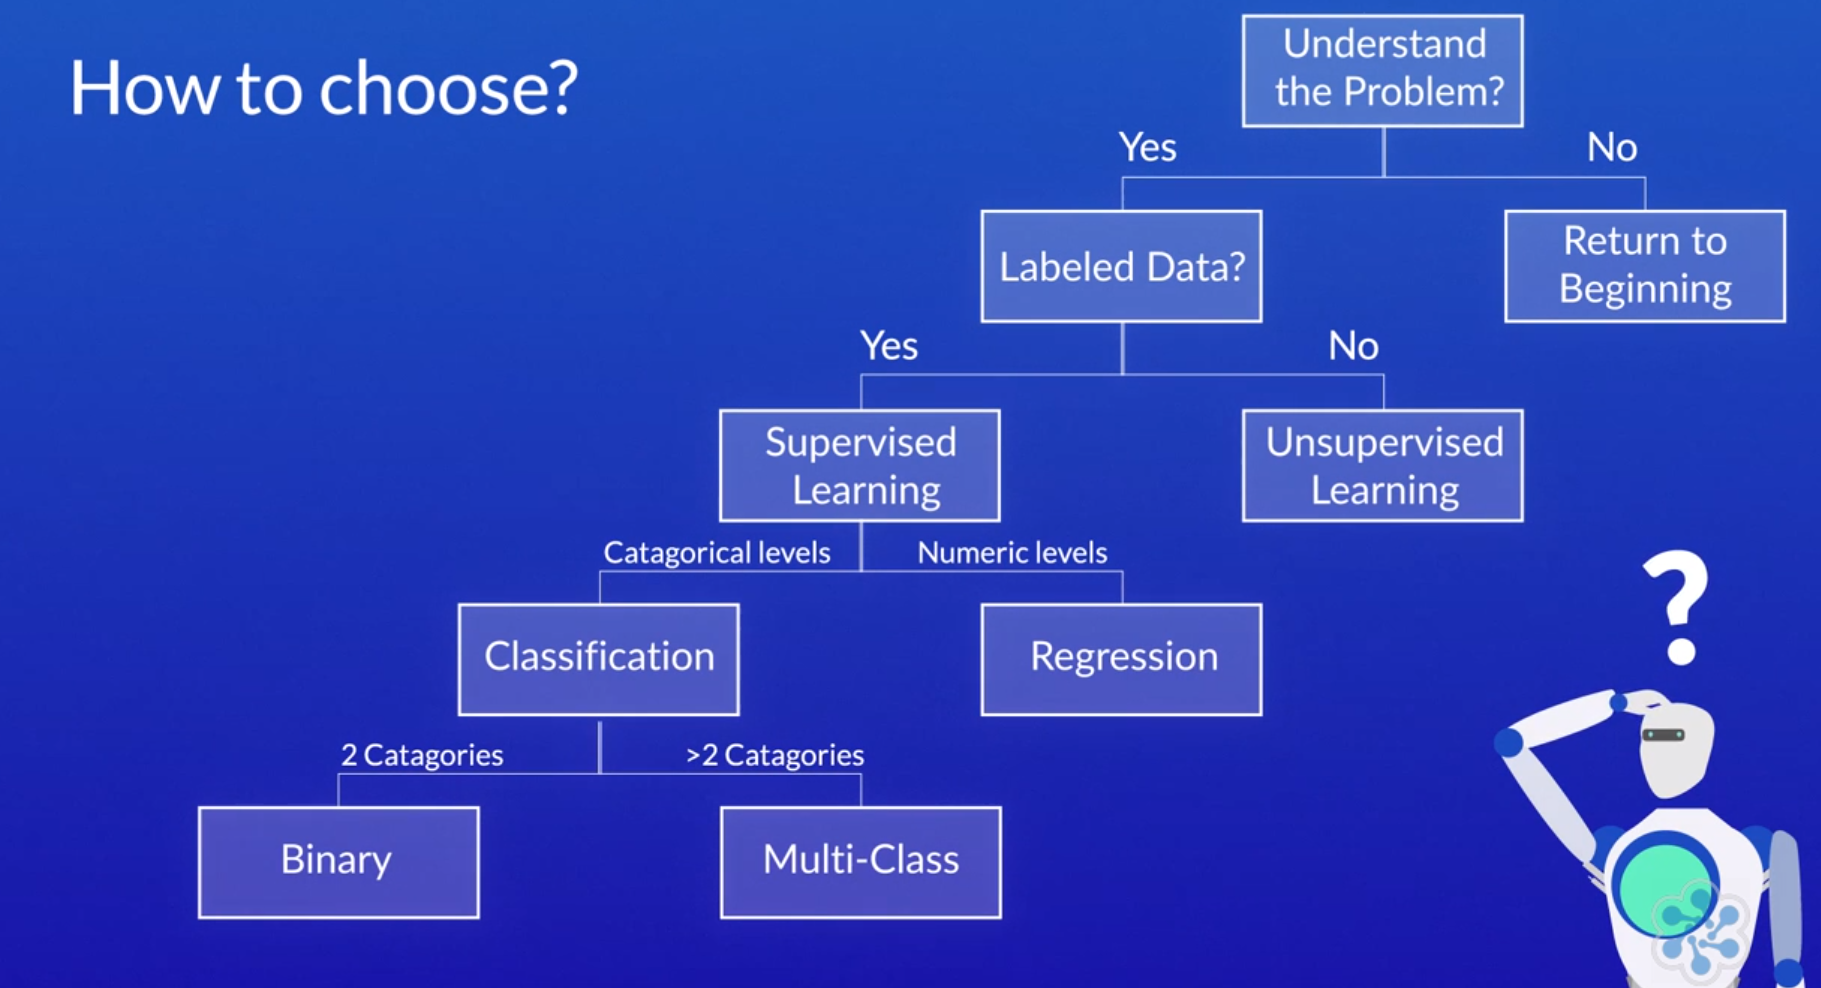

# Case Study: Home Prices

- Predict housing prices for a given neighborhood;
- The **output** is a **numerical** value (Regression).

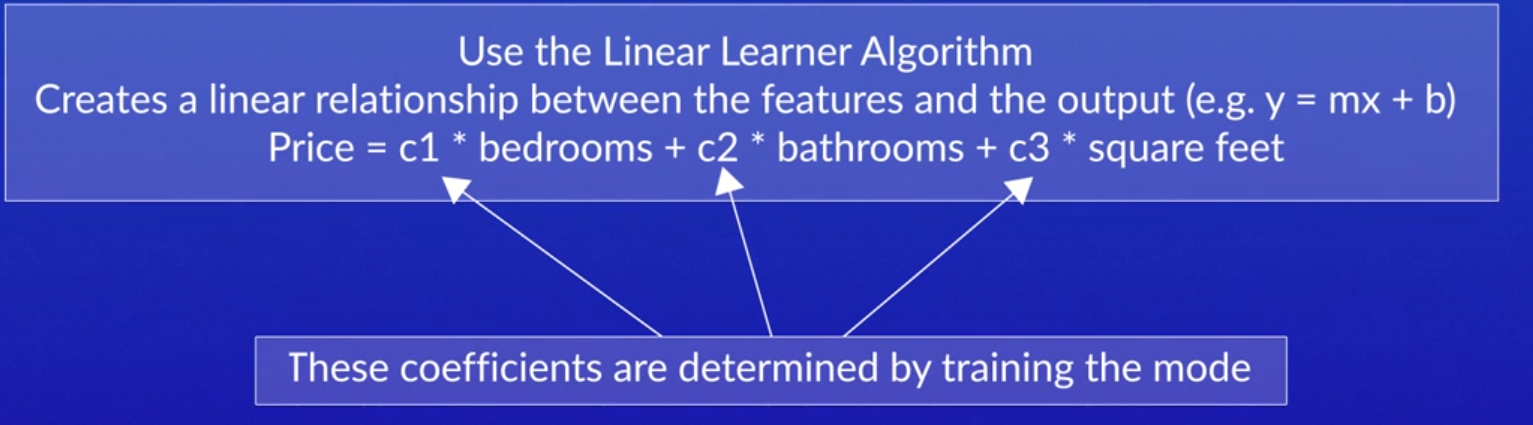

# Case Study: Heart Disease

- Predict whether a patient is at risk for heart disease;
- The **output** is a **categorical** value (Classification).

- Use the **K-Nearest Neighbors Algorithm (KNN)**;
- Assigns the new patient the categoy of the majority of the closest existing labeled patients;
- "K" is a **hyperparameter** which represents the number of existing data points to use for comparison.

# Case Study: Animal Classification

- Classify zoo animals into one of seven groupings (bird, mammal, reptile, fish, amphibian, insect, invertebrate);
- **Multi-class classification problem**: The output is grouping animals into one of many possible groups.

- **eXtreme Gradient Boosting (XGBoost) Algorithm**;
- Creates a large number of decision trees that are combined into an ensemble model to make a prediction.

# Case Study: Targeted Marketing

- How do we market effectively to our potential costumers?
- Target similar consumers for marketing campaigns for a new music streaming service.

- **Unsupervised Learning Problem**: There are no labels in the data;
- **Clustering Problem**: The output is groups (or clusters) of consumers based on similarity.

- **K-Means Clustering**;
- This algorithm groups the data into clusters;
- "K" is a hyperparameter that indicates the number of clusters to create;
- The goal is to minimize the distance of data points within a cluster while maximizing the distance between clusters.

# Machine Learning Workflow Overview

## Prepare Data

- Collect from data sources (S3 Buckets);
- Prepare data, format, label, clean.

## Build Your Model

- Choose an existing algorithm (KNN, Linear Learner, etc);
- Or build your own.

## Train & Tune Model

- Setup and management environments for training;
- Train, debug and tune models;
- Manage training runs (which run provided a certain set of results).

## Deploy & Manage Model

- Deploy model in production environment;
- Monitor the model's performance;
- Validate the predictions made by the model;
- Scale and manage the production environment as demand increases on your application.

# K-Means Clustering

In [1]:
! pip install pandas sklearn matplotlib
# Import required libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Reading in the Data

We'll use the pandas library to load in our data. We can get an idea of data using the ```sample``` function to display a random set from our data.

Import the data into a pandas data frame by using the ```read_csv``` function.

In [2]:
# Read in data from file
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dados/lung_functions.csv")
data.sample(10)

ID  AREA  FSEX  FAGE  FHEIGHT  ...  CAGE  CHEIGHT  CWEIGHT  CFVC  CFEV1
83    84     3     1    37       68  ...    14       70      156   563    474
23    24     1     1    30       71  ...     8       50       50   158    144
98    99     4     1    30       71  ...     7       48       55   155    138
26    27     2     1    33       66  ...    10       55       73   233    190
69    70     2     1    36       66  ...    13       61      104   293    269
1      2     1     1    40       72  ...    10       56       66   323    239
114  115     4     1    36       69  ...    12       61       76   319    280
72    73     2     1    42       69  ...    16       64      125   325    272
15    16     1     1    32       71  ...     9       55       61   169    149
91    92     3     1    38       66  ...     8       46       45   163    127

[10 rows x 20 columns]

With the data loaded into a pandas data frame, we can now reformat the data so that the same variables for mothers, fathers and oldest children are in the same columns. We will also add in a Category field to show who the original data represented, and update the ID column by appending a letter to the original id value to uniquely identify the data point.

In [3]:
# Parse data so father, mother and child stats are in the same columns with a category label to indicate family member
father = data[['ID','AREA','FSEX','FAGE','FHEIGHT','FWEIGHT','FFVC','FFEV1']].copy()
father.columns = ['ID','Area','Sex','Age','Height','Weight','FVC','FEV1']
father['ID'] = [''.join(['F',str(id)]) for id in father['ID']]
father['Category'] = 'Father'

mother = data[['ID','AREA','MSEX','MAGE','MHEIGHT','MWEIGHT','MFVC','MFEV1']].copy()
mother.columns = ['ID','Area','Sex','Age','Height','Weight','FVC','FEV1']
mother['ID'] = [''.join(['M',str(id)]) for id in mother['ID']]
mother['Category'] = 'Mother'

child = data[['ID','AREA','CSEX','CAGE','CHEIGHT','CWEIGHT','CFVC','CFEV1']].copy()
child.columns = ['ID','Area','Sex','Age','Height','Weight','FVC','FEV1']
child['ID'] = [''.join(['C',str(id)]) for id in child['ID']]
child['Category'] = 'Child'

With the data reorganized, we can use pandas again to merge it into a new dataset. To get an idea of what we're looking at, let's display the first 10 rows.

In [4]:
# Create new dataset from the cleaned lists above
clean_data = pd.concat([father,mother,child],axis=0)

# Display a random set from the data
clean_data.sample(10)

ID  Area  Sex  Age  Height  Weight  FVC  FEV1 Category
45    M46     2    2   47      65     200  252   248   Mother
19    F20     1    1   40      69     178  618   479   Father
108  M109     4    2   30      65     132  399   375   Mother
24    M25     2    2   34      64     176  418   351   Mother
25    M26     2    2   33      63     124  319   286   Mother
1      C2     1    1   10      56      66  323   239    Child
44    F45     2    1   46      67     186  449   405   Father
6      F7     1    1   35      64     145  345   339   Father
107  C108     4    2   12      59      73  299   268    Child
6      C7     1    2   11      54      70  218   163    Child

## Normalization

In [5]:
# Scale the data using min/max normalization
minmax = MinMaxScaler()
scaled_data = minmax.fit_transform(clean_data[['FEV1', 'FVC']])

## Clustering

For our purposes, ```k=3``` is chosen. This was chosen because the number of data points in each category will be examined for each cluster. Since there are 3 categories (fathers, mothers and oldest children), k=3 is chosen to see if the clusters could approximately recreate these categories.

In [6]:
# Specify number of clusters
k = 3

# Ensures that the state of clustering remains the
# same with each execution. ensures consistant results
# within this lab
consistant_randomness = 42

# Run the algorithm
kmeans = KMeans(n_clusters=k, random_state=consistant_randomness)

# Group data into clusters
kmeans.fit(scaled_data)

# Labels for each data point
clusters = kmeans.labels_

# Centroids for each cluster
centroids = minmax.inverse_transform(kmeans.cluster_centers_)

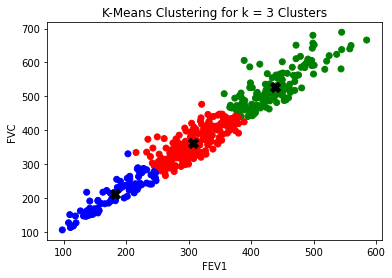

In [7]:
# Define colors for each cluster
colors = ['red', 'blue', 'green', 'black'] # more colors if k > 4

# Initialize the graph
fig, ax = plt.subplots()

ax.scatter(x=clean_data['FEV1'], y=clean_data['FVC'], c=[colors[cluster] for cluster in clusters])
ax.scatter(x=centroids[:,0], y=centroids[:,1], c='black', marker='X', s=100)

# Set graph labels
ax.set_xlabel('FEV1')
ax.set_ylabel('FVC')
ax.set_title('K-Means Clustering for k = {} Clusters'.format(k))

# Display the graph
plt.show()

In [8]:
x, y = 300, 350

# New point coordinates on the original scales
new_point = [[x,y]]

# Scale the values
scaled_point = minmax.transform(new_point)

# Assign the new point to a cluster
assigned_cluster = kmeans.predict(scaled_point)
print('The new point is in the {:s} cluster.'.format(colors[assigned_cluster[0]]))

The new point is in the red cluster.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


## Examining the Outcome

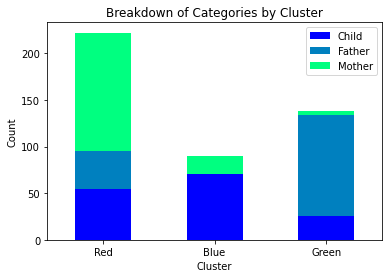

In [9]:
# Data for plotting
clean_data['Cluster'] = clusters
plot_data = clean_data.groupby(['Category','Cluster']).size().reset_index()
plot_data.rename(columns={0:'Count'}, inplace=True)

# Create stacked bar chart
pivot = plot_data.pivot(index='Cluster', columns='Category', values='Count')
pivot.plot.bar(stacked=True, cmap='winter')
plt.xticks(range(0,k), 
           [colors[i].capitalize() for i in pivot.index], 
           rotation='horizontal')
plt.ylabel('Count')
plt.title('Breakdown of Categories by Cluster')
plt.legend()

# Display graph
plt.show()

While the clusters aren't a perfect breakdown between the categories, they make sense as height is strongly correlated with FEV1 and FVC. People who are taller have larger values for both features. Thus, men (fathers) would tend to have the highest values, as seen in the red cluster, while children would have the lowest values, as seen in the blue cluster, which has some overlap with the presumably shortest mothers but no adult men. The second cluster (the middle green cluster) has all three groups but is dominated by adult women (the mothers).